In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from pandas import get_dummies
from sklearn.model_selection import GridSearchCV

In [231]:
data=pd.read_excel('/Users/hayeon/Downloads/전체데이터.xlsx')

In [232]:
data.fillna(0, inplace=True)

In [233]:
data.drop(['계절','계절번호'], axis=1, inplace=True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['date','PM10 (ug/m3)','PM2.5 (ug/m3)'], axis=1),
                                                   data[['PM10 (ug/m3)','PM2.5 (ug/m3)']])

In [9]:
knn = KNeighborsRegressor()

In [10]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(np.mean(y_test == y_pred))
print(r2_score(y_test, y_pred))

PM10 (ug/m3)     0.002681
PM2.5 (ug/m3)    0.010724
dtype: float64
0.018468565393110703


In [16]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [17]:
gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Best Score :  0.11181336531814212
Best Test Score :  0.09066853867407088


In [23]:
# Standard Scaler
scaler_s = StandardScaler() # Scaling
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(scaler_s.transform(X_test), columns = X_test.columns)
X_train_s.head()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),O3 (ppm),NO2 (ppm),CO (ppm),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
0,-1.032801,-0.805374,-1.396247,-1.636784,-1.166145,-1.294713,-0.942957,-1.006344,-0.221592,-0.591291,1.595662,-0.28583,0.404276,-0.641739
1,0.093708,-0.435366,-0.115017,-0.405341,0.085719,-0.448019,-0.203149,0.281316,-0.792611,-1.142177,1.140753,0.76152,0.774145,-0.159719
2,-0.675615,-0.553768,-0.813870,-1.054345,-0.553531,-0.579727,-0.203149,1.890890,-1.363629,-0.591291,0.918353,-0.28583,1.328948,-0.362198
3,-0.455809,-0.686972,-0.085898,-0.505188,-0.020822,-0.749066,-0.203149,-1.247780,-1.282055,-0.591291,0.615081,-0.28583,-0.335463,0.108599
4,0.011280,-0.390965,0.438241,0.410074,0.724969,-0.034080,-0.942957,0.764188,-0.711037,-0.591291,0.392681,-0.28583,-0.890266,-2.237363


In [18]:
knn2 = KNeighborsRegressor(metric='euclidean', n_neighbors=6, weights='distance')

In [24]:
knn2.fit(X_train_s, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=6, weights='distance')

In [25]:
y_pred = knn2.predict(X_test_s)

In [26]:
print(np.mean(y_test ==y_pred))
print(r2_score(y_test, y_pred))

PM10 (ug/m3)     0.005362
PM2.5 (ug/m3)    0.005362
dtype: float64
0.4916839612676956


In [28]:
gs_s = GridSearchCV(knn2, grid_params, cv=10)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Best Score :  0.5162544340032562
Best Test Score :  0.5071406382718514


> # **이상치 탐지**

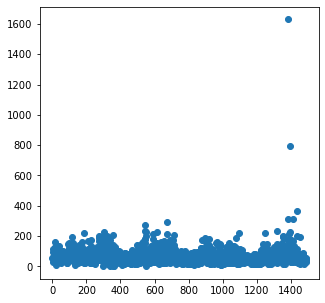

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(data.index, data['PM10(bj)'])

In [38]:
data.columns

Index(['date', 'PM2.5(bj)', 'PM10(bj)', 'PM2.5(gn)', 'PM10(gn)', 'PM2.5(tg)',
       'PM10(tg)', 'SO2 (ppm)', 'PM10 (ug/m3)', 'O3 (ppm)', 'NO2 (ppm)',
       'CO (ppm)', 'PM2.5 (ug/m3)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균'],
      dtype='object')

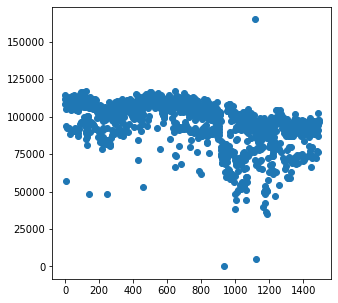

In [44]:
plt.figure(figsize=(5,5))
#plt.subplots(2,2,1)
plt.scatter(data.index, data['평균'])

#plt.subplots(2,2,2)
#plt.scatter(data.index, data['PM2.5(bj)'])

In [54]:
list_col = data.columns

In [56]:
list_col[0]

'date'

In [59]:
plt.rcParams['font.family'] = 'AppleGothic'

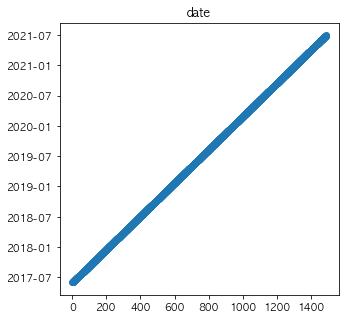

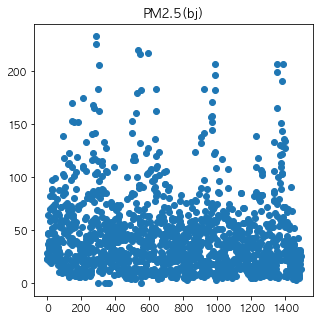

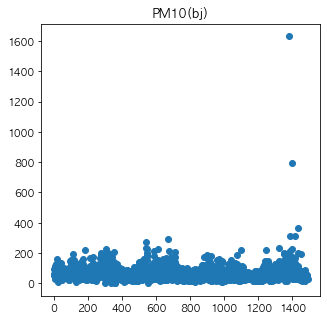

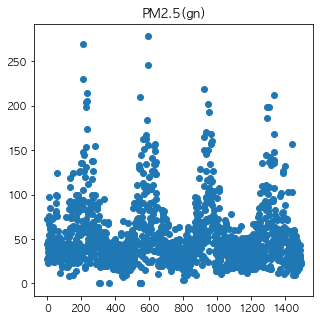

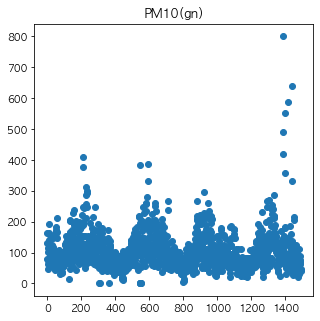

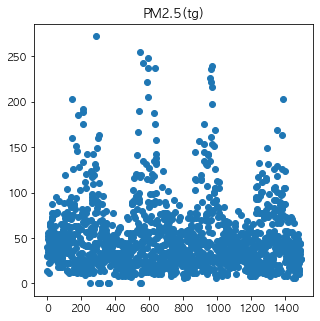

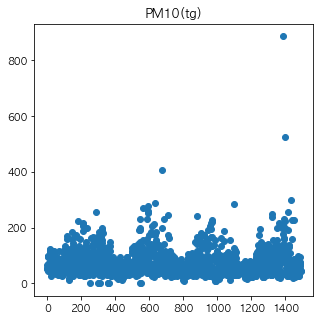

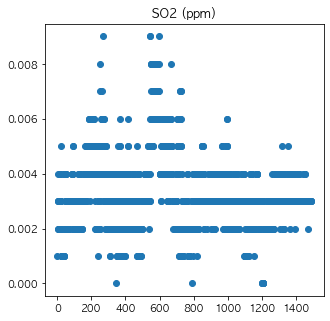

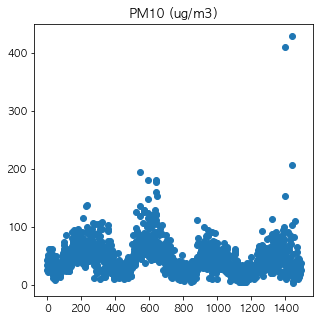

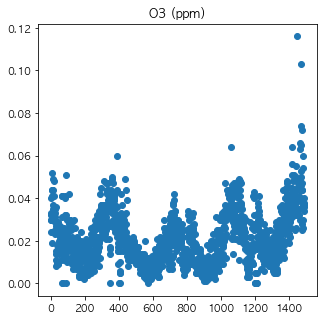

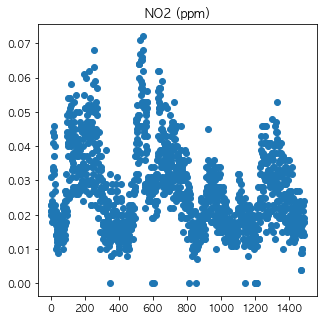

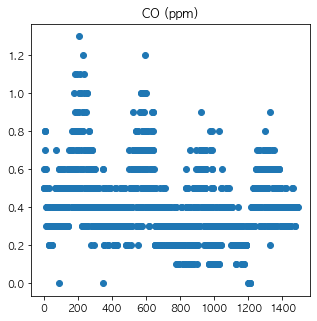

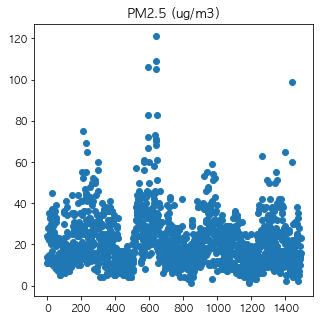

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


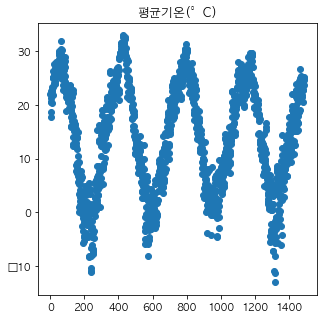

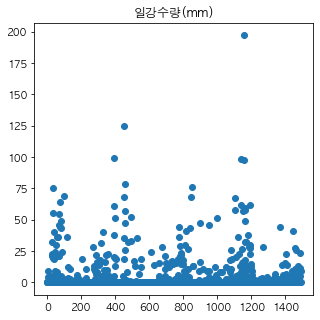

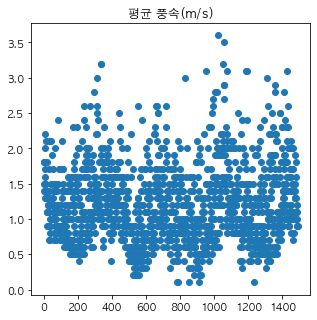

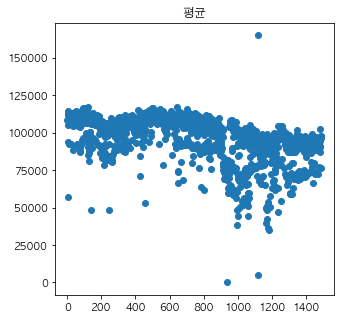

In [60]:
for i in range(len(data.columns)):
    plt.figure(figsize=(5,5))
    plt.scatter(data.index, data[list_col[i]])
    plt.title(list_col[i])

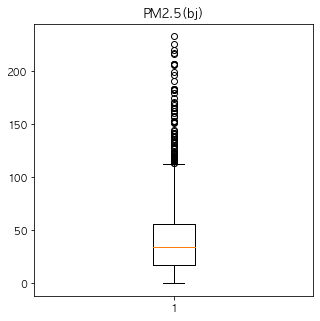

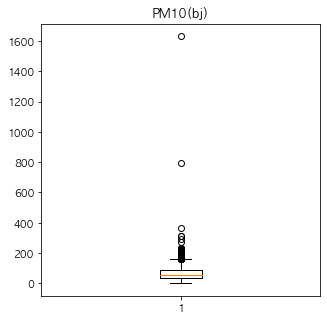

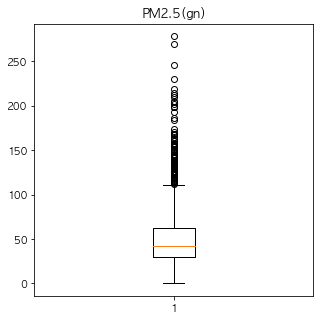

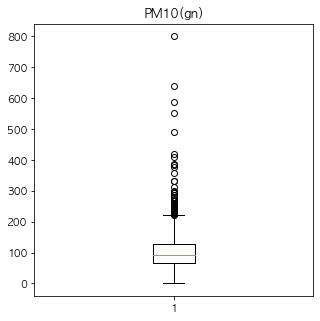

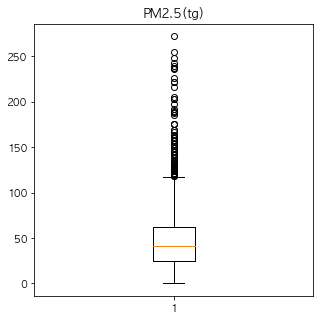

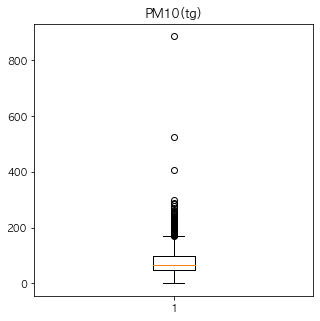

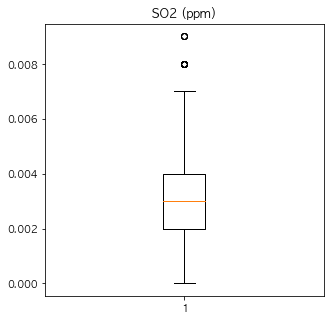

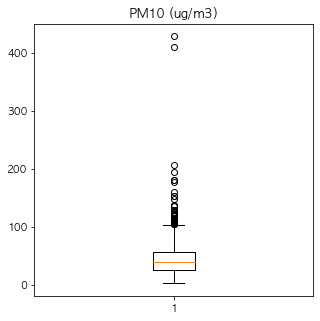

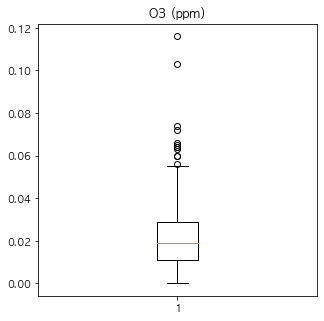

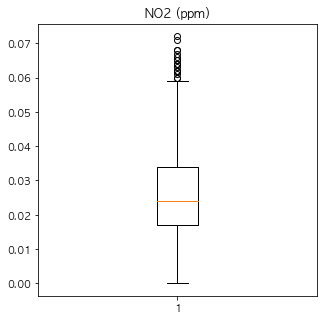

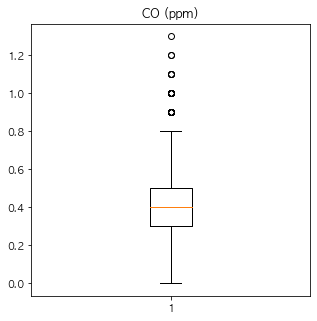

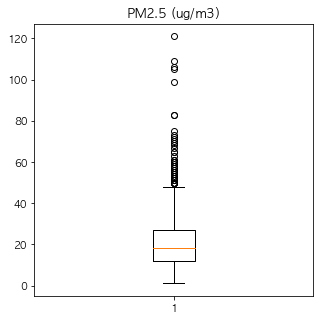

/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hayeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


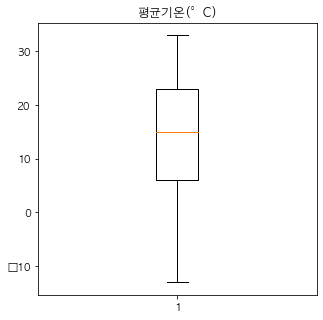

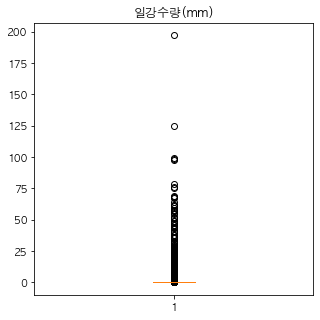

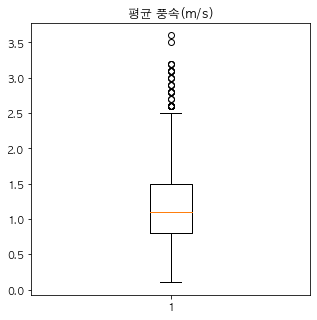

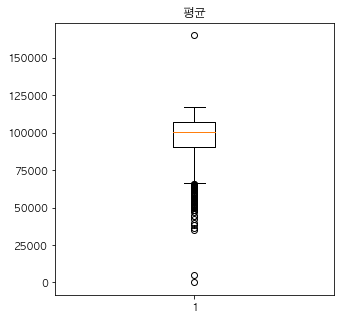

In [65]:
for i in range(1,len(data.columns)):
    plt.figure(figsize=(5,5))
    plt.boxplot(data[list_col[i]])
    plt.title(list_col[i])

(array([  2.,   0.,  12.,  52., 155., 487., 773.,   9.,   0.,   1.]),
 array([     0. ,  16491.2,  32982.4,  49473.6,  65964.8,  82456. ,
         98947.2, 115438.4, 131929.6, 148420.8, 164912. ]),
 <BarContainer object of 10 artists>)

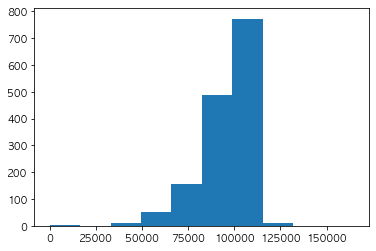

In [66]:
plt.hist(data['평균'])

In [68]:
data.describe()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),PM10 (ug/m3),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,43.328638,69.690141,51.869215,104.706237,49.663313,78.450034,0.003284,44.467471,0.020627,0.026613,0.405298,21.089873,14.179410,3.770959,1.188934,96318.513170
std,36.189759,61.969774,34.753045,61.219636,37.268561,50.578221,0.001347,28.726051,0.012669,0.012224,0.182761,12.989618,9.997112,12.505906,0.545861,14679.421353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,-13.000000,0.000000,0.100000,0.000000
25%,17.500000,38.000000,30.000000,66.000000,25.000000,48.000000,0.002000,26.000000,0.011000,0.017000,0.300000,12.000000,6.050000,0.000000,0.800000,90526.000000
50%,34.000000,57.000000,42.000000,92.000000,41.000000,67.000000,0.003000,39.000000,0.019000,0.024000,0.400000,18.000000,14.900000,0.000000,1.100000,100093.000000
75%,56.000000,86.000000,62.500000,128.000000,62.000000,97.000000,0.004000,57.000000,0.029000,0.034000,0.500000,27.000000,22.900000,0.000000,1.500000,106956.195312
max,233.000000,1630.000000,278.000000,800.000000,272.000000,885.000000,0.009000,428.000000,0.116000,0.072000,1.300000,121.000000,32.900000,197.000000,3.600000,164912.000000


In [69]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [70]:
outlier_iqr(data, '평균')

IQR은 16430.1953125 이다.
lower bound 값은 65880.70703125 이다.
upper bound 값은 131601.48828125 이다.
총 이상치 개수는 67 이다.


In [106]:
for i in range(1, 17):
    print('%s'%data.columns[i])
    outlier_iqr(data, data.columns[i])
    print('\n')
    

PM2.5(bj)
IQR은 38.5 이다.
lower bound 값은 -40.25 이다.
upper bound 값은 113.75 이다.
총 이상치 개수는 80 이다.


PM10(bj)
IQR은 48.0 이다.
lower bound 값은 -34.0 이다.
upper bound 값은 158.0 이다.
총 이상치 개수는 68 이다.


PM2.5(gn)
IQR은 32.5 이다.
lower bound 값은 -18.75 이다.
upper bound 값은 111.25 이다.
총 이상치 개수는 94 이다.


PM10(gn)
IQR은 62.0 이다.
lower bound 값은 -27.0 이다.
upper bound 값은 221.0 이다.
총 이상치 개수는 52 이다.


PM2.5(tg)
IQR은 37.0 이다.
lower bound 값은 -30.5 이다.
upper bound 값은 117.5 이다.
총 이상치 개수는 86 이다.


PM10(tg)
IQR은 49.0 이다.
lower bound 값은 -25.5 이다.
upper bound 값은 170.5 이다.
총 이상치 개수는 67 이다.


SO2 (ppm)
IQR은 0.002 이다.
lower bound 값은 -0.001 이다.
upper bound 값은 0.007 이다.
총 이상치 개수는 20 이다.


PM10 (ug/m3)
IQR은 31.0 이다.
lower bound 값은 -20.5 이다.
upper bound 값은 103.5 이다.
총 이상치 개수는 41 이다.


O3 (ppm)
IQR은 0.0179999999999999 이다.
lower bound 값은 -0.01599999999999985 이다.
upper bound 값은 0.05599999999999975 이다.
총 이상치 개수는 12 이다.


NO2 (ppm)
IQR은 0.017 이다.
lower bound 값은 -0.0085 이다.
upper bound 값은 0.059500000000000004 이다.
총 이상치 개수는 19 이다.


CO (

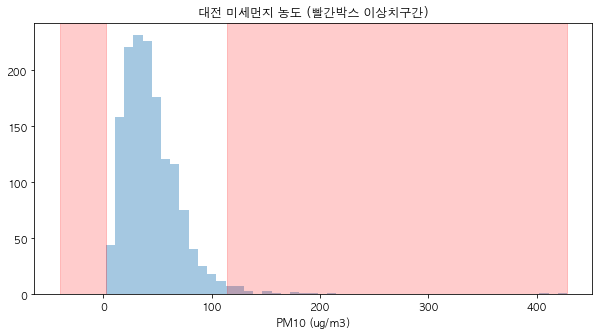

In [91]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.distplot(data['PM10 (ug/m3)'], kde=False)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=data['PM10 (ug/m3)'].min(), alpha=0.2, color='red')

plt.axvspan(xmin=upper, xmax=data['PM10 (ug/m3)'].max(), alpha=0.2, color='red')
plt.title('대전 미세먼지 농도 (빨간박스 이상치구간)')

plt.show()

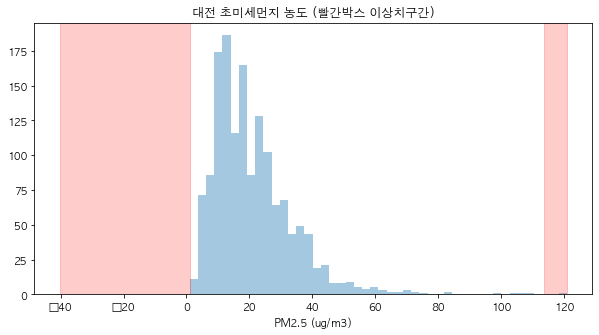

In [87]:
plt.figure(figsize=(10,5))

sns.distplot(data['PM2.5 (ug/m3)'], kde=False)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=data['PM2.5 (ug/m3)'].min(), alpha=0.2, color='red')

plt.axvspan(xmin=upper, xmax=data['PM2.5 (ug/m3)'].max(), alpha=0.2, color='red')
plt.title('대전 초미세먼지 농도 (빨간박스 이상치구간)')
plt.show()

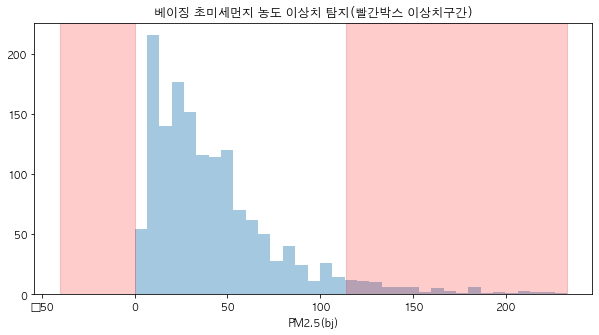

In [92]:
plt.figure(figsize=(10,5))

sns.distplot(data['PM2.5(bj)'], kde=False)


# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=data['PM2.5(bj)'].min(), alpha=0.2, color='red')

plt.axvspan(xmin=upper, xmax=data['PM2.5(bj)'].max(), alpha=0.2, color='red')
plt.title('베이징 초미세먼지 농도 이상치 탐지(빨간박스 이상치구간)')
plt.show()

In [108]:
data

,date,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),PM10 (ug/m3),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
0,2017-06-01,23,57,72,164,40,67,0.001,42,0.024,0.023,0.5,24,22.0,0.0,1.8,108656.0
1,2017-06-02,23,65,44,132,14,52,0.002,34,0.030,0.023,0.6,14,20.6,0.0,1.5,114477.0
2,2017-06-03,29,56,28,79,30,54,0.003,25,0.032,0.021,0.5,11,20.6,0.0,1.8,111557.0
3,2017-06-04,48,93,48,114,35,70,0.003,31,0.040,0.020,0.5,14,21.2,0.0,1.4,57121.0
4,2017-06-05,65,115,23,63,52,97,0.004,35,0.033,0.031,0.7,14,22.6,0.0,1.3,112199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,2021-06-26,22,40,26,44,32,61,0.003,19,0.036,0.018,0.4,10,22.7,11.5,0.9,91068.0
1487,2021-06-27,26,48,38,66,37,70,0.003,22,0.040,0.014,0.4,13,24.9,0.0,0.9,76373.0
1488,2021-06-28,32,53,43,75,43,77,0.003,24,0.038,0.018,0.4,15,25.1,0.0,1.2,97692.0
1489,2021-06-29,26,40,22,40,27,46,0.003,25,0.037,0.019,0.4,16,23.7,0.0,1.0,96636.0


In [111]:
outlier_iqr(data, 'PM10 (ug/m3)')

IQR은 31.0 이다.
lower bound 값은 -20.5 이다.
upper bound 값은 103.5 이다.
총 이상치 개수는 41 이다.


> # **수치 높게나온 모델 (StandardScaler KNN Model (PM10))**

In [119]:
X_train_s, X_test_s, y_train, y_test = train_test_split(data.drop(['date','PM10 (ug/m3)'], axis=1),
                                                   data['PM10 (ug/m3)'], test_size=0.2)

In [120]:
# Standard Scaler
scaler_s = StandardScaler() # Scaling
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), columns = X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.transform(X_test_s), columns = X_test_s.columns)
X_train_s.head()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
0,-0.772016,-0.190366,-0.855052,-0.565880,-0.655647,0.156680,-0.199106,1.158049,-0.397891,-0.021296,-0.889028,0.371479,-0.296241,-0.718091,-0.435169
1,-0.360225,-0.691653,-0.797623,-0.804471,0.018180,-0.424773,-0.199106,-1.167603,-1.060997,-0.573139,-0.646769,1.457417,-0.296241,0.021403,0.662965
2,0.765337,-0.053651,-0.596621,-0.724941,-0.170492,-0.211573,0.540252,0.997660,0.182326,-0.021296,0.968290,1.616821,-0.296241,-0.533217,1.227958
3,-0.909279,-0.889130,-0.165903,0.133987,-0.817366,-0.676736,-0.199106,-0.044874,-0.480779,-1.124981,-0.566016,1.357790,-0.296241,-0.718091,0.989139
4,-0.744563,-0.570129,-0.969910,-1.265748,-0.574788,-0.851172,-0.938463,-0.927018,-1.558326,-1.676824,-0.808275,1.457417,-0.296241,1.870138,-2.132432


In [192]:
knn_s = KNeighborsRegressor()
#knn_s = KNeighborsRegressor(metric='euclidean', n_neighbors= 2, weights= 'distance')

In [193]:
knn_s.fit(X_train_s, y_train)

KNeighborsRegressor()

In [194]:
y_pred_s = knn_s.predict(X_test_s)

In [195]:
print(np.mean(y_test == y_pred_s))
print(r2_score(y_test, y_pred_s))

0.016722408026755852
0.6810412500954393


In [196]:
gs_s = GridSearchCV(knn_s, grid_params, cv=10)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Score :  0.658940022897048
Best Test Score :  0.695376839377249


In [234]:
X_train_m, X_test_m, y_train, y_test = train_test_split(data.drop(['date','PM10 (ug/m3)'], axis=1),
                                                   data['PM10 (ug/m3)'])

In [235]:
# Standard Scaler
scaler_m = MinMaxScaler() # Scaling
X_train_m = pd.DataFrame(scaler_m.fit_transform(X_train_m), columns = X_train_m.columns)
X_test_m = pd.DataFrame(scaler_m.transform(X_test_m), columns = X_test_m.columns)
X_train_m.head()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균
0,0.145923,0.051534,0.241007,0.186520,0.209559,0.124294,0.333333,0.155172,0.366197,0.307692,0.084034,0.296296,0.0,0.323529,0.412497
1,0.137339,0.034969,0.485612,0.344828,0.283088,0.132203,0.666667,0.051724,0.845070,1.000000,0.445378,0.389978,0.0,0.088235,0.614124
2,0.030043,0.020245,0.100719,0.141066,0.062500,0.067797,0.333333,0.293103,0.183099,0.153846,0.134454,0.400871,0.0,0.794118,0.286736
3,0.845494,0.087117,0.169065,0.100313,0.386029,0.103955,0.333333,0.120690,0.309859,0.230769,0.184874,0.442266,0.0,0.382353,0.593980
4,0.098712,0.094479,0.147482,0.246082,0.084559,0.213559,0.333333,0.379310,0.183099,0.153846,0.176471,0.501089,0.0,0.617647,0.554617


In [241]:
knn_m = KNeighborsRegressor()
#knn_m = KNeighborsRegressor(metric='euclidean', n_neighbors=4, weights='distance')

In [242]:
knn_m.fit(X_train_m, y_train)

KNeighborsRegressor()

In [243]:
y_pred_m = knn_m.predict(X_test_m)

In [244]:
print(np.mean(y_test == y_pred_m))
print(r2_score(y_test, y_pred_m))

0.0160857908847185
0.6118478122606608


In [245]:
gs_m = GridSearchCV(knn_m, grid_params, cv=10)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best Score :  0.6903677663117274
Best Test Score :  0.6016734756999792


In [211]:
from sklearn.neighbors import KNeighborsRegressor
X, y = (data.drop(['date','PM10 (ug/m3)'], axis=1), data['PM10 (ug/m3)'])

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)